In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('Cardekho_Extract.csv')
df.head(2)

,Unnamed: 0,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5


In [ ]:
df.drop(columns=['Unnamed: 0','web-scraper-order','web-scraper-start-url','new-price','mileage','seats','engine','max_power'], axis=1, inplace=True)


In [ ]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type
0,Maruti Alto Std,1.2 Lakh*,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual
1,Hyundai Grand i10 Asta,5.5 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual
2,Hyundai i20 Asta,2.15 Lakh*,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual


In [ ]:
# kilometer driven
df['km_driven'] = df['km_driven'].str.split(' ', n=1, expand=True)[0]
df['km_driven'] = df['km_driven'].str.replace(',','')
# Mileage


In [ ]:
df = df.dropna()


In [ ]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,object,0,0.000000
2,year,float64,0,0.000000
3,seller_type,object,0,0.000000
4,km_driven,object,0,0.000000
5,owner_type,object,0,0.000000
6,fuel_type,object,0,0.000000
7,transmission_type,object,0,0.000000


In [ ]:
'''price = str(df['selling_price'][1102])[:-1]
fprice = float(price.split(' ')[0])



digit = str(df['selling_price'][1102])
fdigit = (digit.split(' ')[1])
if fdigit == 'Lakh*':
            fprice = fprice * 100000
print(float(fprice))
print(fdigit)'''



"price = str(df['selling_price'][1102])[:-1]\nfprice = float(price.split(' ')[0])\n\n\n\ndigit = str(df['selling_price'][1102])\nfdigit = (digit.split(' ')[1])\nif fdigit == 'Lakh*':\n            fprice = fprice * 100000\nprint(float(fprice))\nprint(fdigit)"

In [ ]:
'''price = str(df['selling_price'][317])
price = price.replace(',', '')
float(price)'''

"price = str(df['selling_price'][317])\nprice = price.replace(',', '')\nfloat(price)"

In [ ]:
df1 = df.copy()

In [ ]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999],
           dtype='int64', length=5990)

In [ ]:
df.tail()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type
20021,Toyota Platinum Etios 1.4 GXD,6.5 Lakh*,2017.0,Dealer,69480,First Owner,Diesel,Manual
20022,Maruti Ertiga BSIV VXI,9.25 Lakh*,2019.0,Dealer,18000,First Owner,Petrol,Manual
20023,Skoda Rapid 1.5 TDI Elegance,4.25 Lakh*,2015.0,Dealer,67000,First Owner,Diesel,Manual
20024,Mahindra XUV500 W6 2WD,12.25 Lakh*,2016.0,Dealer,3800000,First Owner,Diesel,Manual
20025,Honda City i-VTEC CVT VX,12 Lakh*,2019.0,Dealer,13000,First Owner,Petrol,Automatic


In [ ]:
df = df.reset_index(drop=True)
missing_i = [i for i in range(1, len(df.index)) if i not in df.index]

missing_i

[]

In [ ]:
for i in range(len(df.index)):
    try:
        price = str(df['selling_price'][i])[:-1]
        fprice = float(price.split(' ')[0])
        digit = str(df['selling_price'][i])
        fdigit = (digit.split(' ')[1])
        if fdigit == 'Lakh*':
            fprice = fprice * 100000
            df['selling_price'][i] = fprice
        elif fdigit == 'Cr*':
            fprice = fprice * 10000000
            df['selling_price'][i] = fprice
    except:
        '''if i in missing_i:
          continue'''
        price = str(df['selling_price'][i])[:-1]
        price = price.replace(',', '')
        df['selling_price'][i] = float(price)

In [ ]:
df.tail()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type
19975,Toyota Platinum Etios 1.4 GXD,650000.0,2017.0,Dealer,69480,First Owner,Diesel,Manual
19976,Maruti Ertiga BSIV VXI,925000.0,2019.0,Dealer,18000,First Owner,Petrol,Manual
19977,Skoda Rapid 1.5 TDI Elegance,425000.0,2015.0,Dealer,67000,First Owner,Diesel,Manual
19978,Mahindra XUV500 W6 2WD,1225000.0,2016.0,Dealer,3800000,First Owner,Diesel,Manual
19979,Honda City i-VTEC CVT VX,1200000.0,2019.0,Dealer,13000,First Owner,Petrol,Automatic


In [ ]:
df

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type
0,Maruti Alto Std,120000.0,2012.0,Individual,120000,First Owner,Petrol,Manual
1,Hyundai Grand i10 Asta,550000.0,2016.0,Individual,20000,First Owner,Petrol,Manual
2,Hyundai i20 Asta,215000.0,2010.0,Individual,60000,First Owner,Petrol,Manual
3,Maruti Alto K10 2010-2014 VXI,226000.0,2012.0,Individual,37000,First Owner,Petrol,Manual
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,2015.0,Dealer,30000,First Owner,Diesel,Manual
...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,650000.0,2017.0,Dealer,69480,First Owner,Diesel,Manual
19976,Maruti Ertiga BSIV VXI,925000.0,2019.0,Dealer,18000,First Owner,Petrol,Manual
19977,Skoda Rapid 1.5 TDI Elegance,425000.0,2015.0,Dealer,67000,First Owner,Diesel,Manual
19978,Mahindra XUV500 W6 2WD,1225000.0,2016.0,Dealer,3800000,First Owner,Diesel,Manual


In [ ]:
cols = ['selling_price', 'km_driven']

for col in cols:
    try:
        df[col] = df[col].astype(int)
        
    except:
        df[col] = df[col].astype(float)

In [ ]:
df['year']=df['year'].astype(int)
df

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual
...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual
19976,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual
19977,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual
19978,Mahindra XUV500 W6 2WD,1225000,2016,Dealer,3800000,First Owner,Diesel,Manual


In [ ]:
df['company']=df['full_name'].str.split().str.slice(start=0,stop=1).str.join(' ')
df.company.unique()
df

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19976,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19977,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda
19978,Mahindra XUV500 W6 2WD,1225000,2016,Dealer,3800000,First Owner,Diesel,Manual,Mahindra


In [ ]:
df.company.unique()

array(['Maruti', 'Hyundai', 'Ford', 'Mahindra', 'Tata', 'Renault',
       'Nissan', 'Mini', 'Mercedes-Benz', 'Toyota', 'Fiat', 'Volkswagen',
       'Honda', 'Chevrolet', 'Ambassador', 'Datsun', 'Kia', 'BMW',
       'Mitsubishi', 'Audi', 'Skoda', 'Land', 'Jaguar', 'Daewoo',
       'Bentley', 'MG', 'Isuzu', 'Porsche', 'Volvo', 'Lexus', 'Jeep',
       'Premier', 'Maserati', 'Force', 'Lamborghini', 'ISUZU', 'Ferrari',
       'OpelCorsa', 'Mercedes-AMG', 'DC', 'Rolls-Royce', 'Opel'],
      dtype=object)

In [ ]:
df[df['company']=='MG']

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
476,MG Hector Smart Diesel MT BSIV,1698999,2019,Dealer,28000,First Owner,Diesel,Manual,MG
533,MG Hector Hybrid Super MT BSIV,1488000,2020,Dealer,1000,First Owner,Petrol,Manual,MG
1163,MG Hector Hybrid Sharp MT,1800000,2020,Dealer,4800,First Owner,Petrol,Manual,MG
1730,MG Hector Sharp Diesel Dualtone,1750000,2019,Dealer,20000,First Owner,Diesel,Manual,MG
1772,MG Hector Sharp AT BSIV,1789999,2019,Dealer,11002,First Owner,Petrol,Automatic,MG
2552,MG Hector Sharp DCT,1630000,2019,Dealer,9293,First Owner,Petrol,Automatic,MG
2939,MG Hector Sharp AT BSIV,1855000,2019,Dealer,8500,First Owner,Petrol,Automatic,MG
3636,MG Hector Sharp DCT,1630000,2019,Dealer,6231,First Owner,Petrol,Automatic,MG
3694,MG Hector Sharp Diesel MT,1825000,2020,Dealer,12500,First Owner,Diesel,Manual,MG
7403,MG Hector Hybrid Sharp MT BSIV,1855000,2019,Dealer,8100,First Owner,Petrol,Manual,MG


In [ ]:
'''for i in range(15):
  print(str(df['full_name'][i]).split()[0])'''

"for i in range(15):\n  print(str(df['full_name'][i]).split()[0])"

In [ ]:
'''for i in range(19980):
  if i in missing_i:
          continue
  else:
            df['full_name'][i] = str(df['full_name'][i]).split()[0]
#df.drop(columns='full_name')'''
df.rename(columns={'full_name':'model'},inplace=True)
df

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19976,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19977,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda
19978,Mahindra XUV500 W6 2WD,1225000,2016,Dealer,3800000,First Owner,Diesel,Manual,Mahindra


In [ ]:
df

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19976,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19977,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda
19978,Mahindra XUV500 W6 2WD,1225000,2016,Dealer,3800000,First Owner,Diesel,Manual,Mahindra


In [ ]:
'''missing_it = [i for i in range(1, len(df.index)) if i not in df.index]
missing_it'''

[]

In [ ]:
df.describe(include='all')

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
count,19980,1.998000e+04,19980.000000,19980,1.998000e+04,19980,19980,19980,19980
unique,3321,NaN,NaN,3,NaN,3,5,2,42
top,Maruti Swift Dzire VDI,NaN,NaN,Dealer,NaN,First Owner,Diesel,Manual,Maruti
freq,210,NaN,NaN,11973,NaN,19974,9817,16029,5650
mean,NaN,7.392066e+05,2014.525125,NaN,5.824488e+04,NaN,NaN,NaN,NaN
std,NaN,9.103088e+05,3.249185,NaN,5.172509e+04,NaN,NaN,NaN,NaN
min,NaN,2.500000e+04,1991.000000,NaN,1.000000e+02,NaN,NaN,NaN,NaN
25%,NaN,3.400000e+05,2013.000000,NaN,3.116425e+04,NaN,NaN,NaN,NaN
50%,NaN,5.200000e+05,2015.000000,NaN,5.200000e+04,NaN,NaN,NaN,NaN
75%,NaN,7.850000e+05,2017.000000,NaN,7.400000e+04,NaN,NaN,NaN,NaN


In [ ]:
df['company'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Mahindra', 'Tata', 'Renault',
       'Nissan', 'Mini', 'Mercedes-Benz', 'Toyota', 'Fiat', 'Volkswagen',
       'Honda', 'Chevrolet', 'Ambassador', 'Datsun', 'Kia', 'BMW',
       'Mitsubishi', 'Audi', 'Skoda', 'Land', 'Jaguar', 'Daewoo',
       'Bentley', 'MG', 'Isuzu', 'Porsche', 'Volvo', 'Lexus', 'Jeep',
       'Premier', 'Maserati', 'Force', 'Lamborghini', 'ISUZU', 'Ferrari',
       'OpelCorsa', 'Mercedes-AMG', 'DC', 'Rolls-Royce', 'Opel'],
      dtype=object)

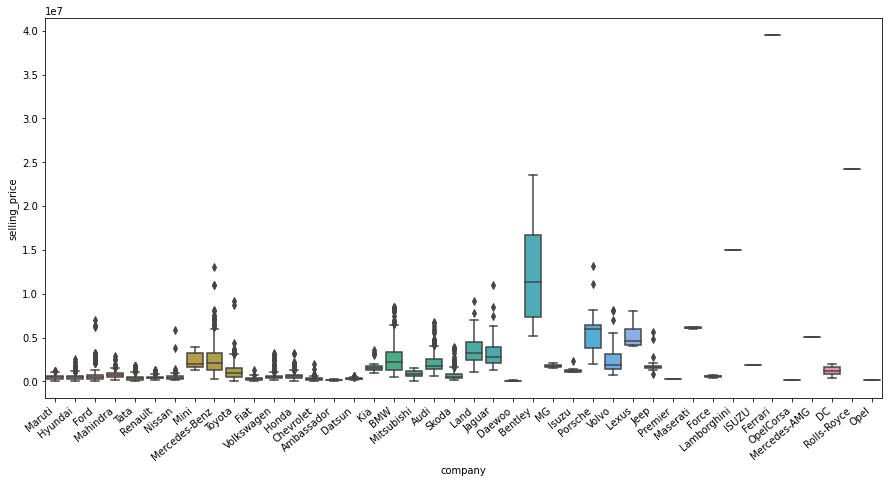

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

KeyboardInterrupt: ignored

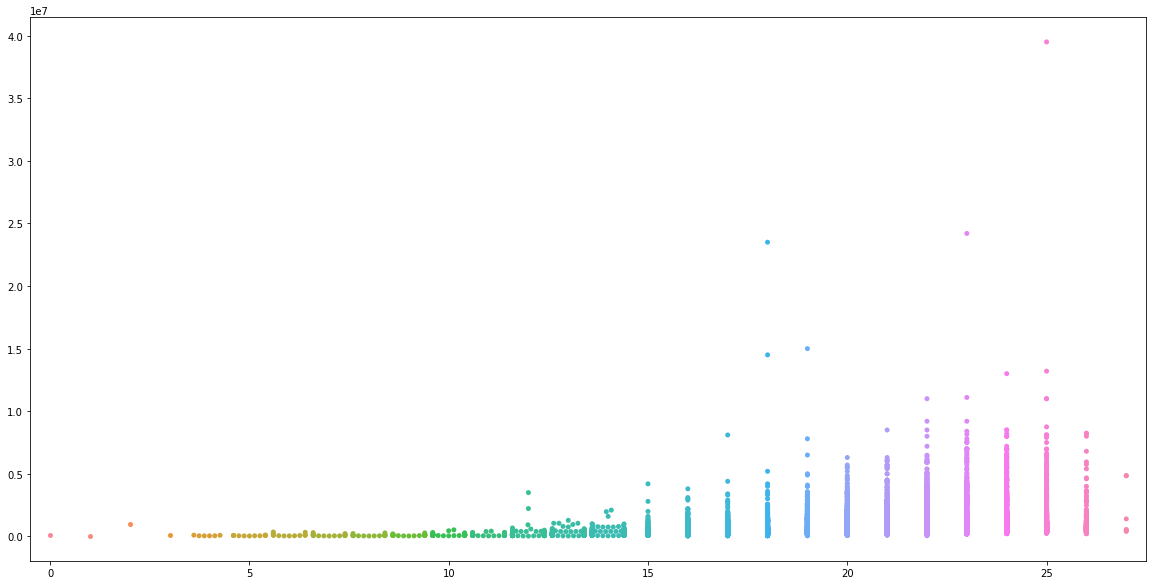

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

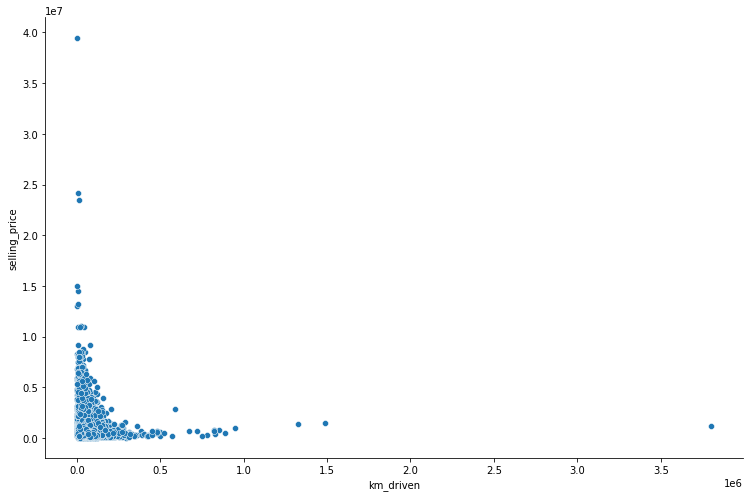

In [ ]:
sns.relplot(x='km_driven',y='selling_price',data=df,height=7,aspect=1.5)

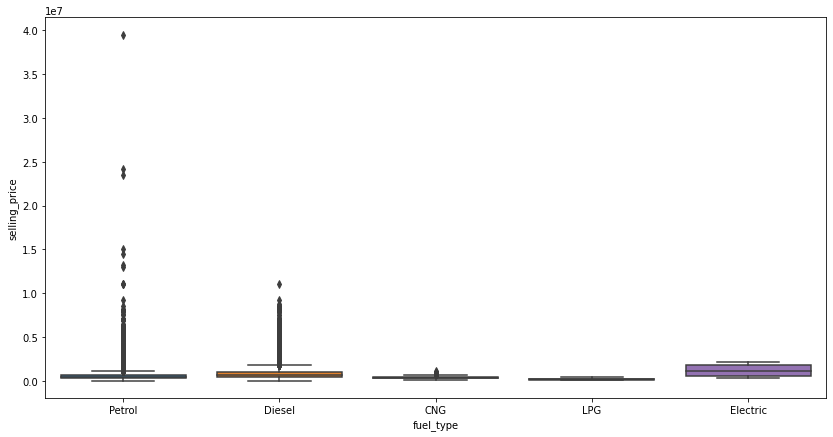

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='selling_price',data=df)

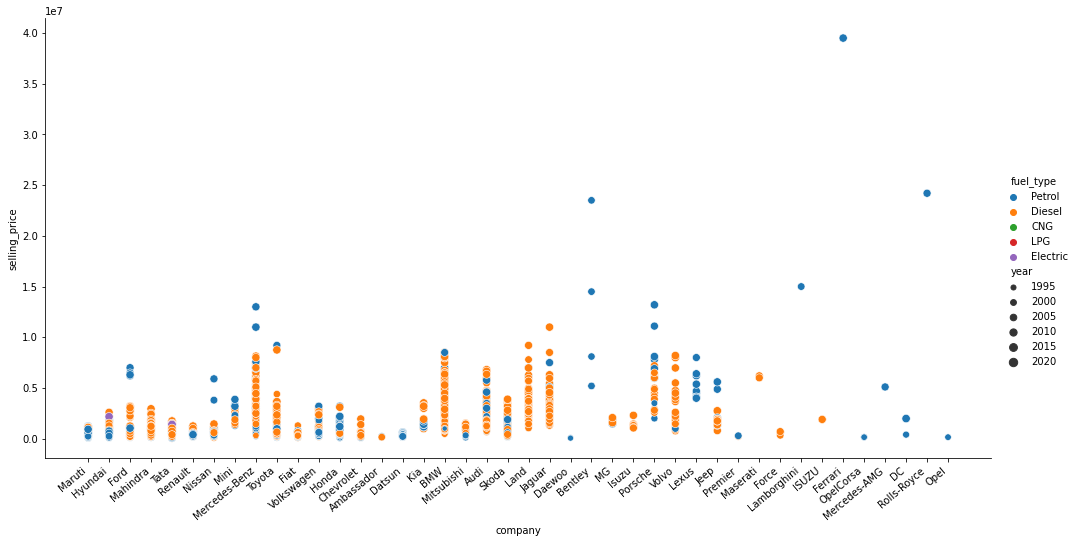

In [ ]:
ax=sns.relplot(x='company',y='selling_price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [ ]:
df

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19976,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19977,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda
19978,Mahindra XUV500 W6 2WD,1225000,2016,Dealer,3800000,First Owner,Diesel,Manual,Mahindra


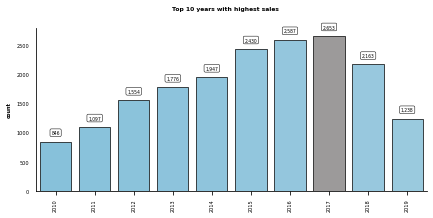

In [ ]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

cars = df.year.value_counts().head(10)
pal = sns.light_palette('#79c6e8', n_colors=50, reverse=True)
pal[7] = '#9c9a9a'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_ylabel(ylabel='count', fontsize=5, weight='bold')

for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+150
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 years with highest sales', fontsize='6', weight='bold')
sns.despine()
plt.show()

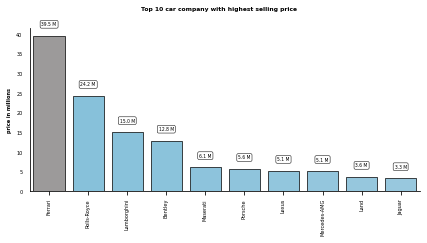

In [ ]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = df.groupby('company')['selling_price'].mean().sort_values(ascending=False).head(10)/1000000
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='price in millions', fontsize=5, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.1f}' + ' M'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+3
    ax.text(x=x, y=y, s=value, fontsize=4.5, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=0.5))
    
fig.suptitle(t='Top 10 car company with highest selling price', fontsize=6, weight='bold')
sns.despine()
plt.show()

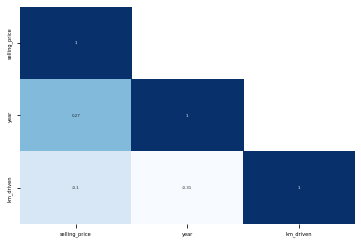

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(df.corr(), cmap='Blues', mask=np.triu(df.corr(), k=1), cbar=False, annot=True,
                 annot_kws=dict(fontsize=4))
ax.set_facecolor('white')
ax.tick_params(labelsize=5)
plt.show()

In [ ]:
null_count()

,features,dtypes,NaN count,NaN percentage
0,model,object,0,0.000000
1,selling_price,int64,0,0.000000
2,year,int64,0,0.000000
3,seller_type,object,0,0.000000
4,km_driven,int64,0,0.000000
5,owner_type,object,0,0.000000
6,fuel_type,object,0,0.000000
7,transmission_type,object,0,0.000000
8,company,object,0,0.000000


In [ ]:
df = df[df['selling_price'] < 20000000]
df = df[df['km_driven'] < 1000000]
df = df.reset_index(drop=True)

In [ ]:
df

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19969,Maruti A Star Vxi,225000,2009,Individual,15000,First Owner,Petrol,Manual,Maruti
19970,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19971,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19972,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda


In [ ]:
df.to_csv('Cleaned_cardekho.csv')

In [ ]:
df.company.value_counts()

Maruti           5650
Hyundai          3646
Honda            1780
Mahindra         1290
Toyota           1205
Tata              975
Ford              908
Volkswagen        762
Renault           636
Mercedes-Benz     500
BMW               483
Skoda             422
Chevrolet         406
Audi              324
Nissan            290
Datsun            170
Fiat              114
Jaguar             80
Land               56
Jeep               45
Volvo              43
Mitsubishi         39
Kia                33
Porsche            26
Mini               23
MG                 20
Isuzu              10
Lexus              10
Force               5
Ambassador          4
Bentley             3
OpelCorsa           3
Daewoo              2
Premier             2
Maserati            2
ISUZU               2
DC                  2
Lamborghini         1
Mercedes-AMG        1
Opel                1
Name: company, dtype: int64

In [ ]:
'''company_name = df.company.value_counts().index[:]
for i in range(df.shape[0]):
    if df['company'][i] in company_name:
         continue
    else:
        df['company'][i] = others''''

SyntaxError: ignored

In [ ]:
df.shape

(19974, 9)

In [ ]:
str(df.owner_type[1])

'First Owner'

In [ ]:
'''for i in range(19974):
        owner = str(df['owner_type'][i])
        if owner == 'First Owner':
            owner = 1
            df['owner_type'][i] = owner
        elif owner == 'Second Owner':
            owner = 2
            df['owner_type'][i] = owner
        elif owner =='Third Owner':
            df['owner_type'][i] = 3'''


"for i in range(19974):\n        owner = str(df['owner_type'][i])\n        if owner == 'First Owner':\n            owner = 1\n            df['owner_type'][i] = owner\n        elif owner == 'Second Owner':\n            owner = 2\n            df['owner_type'][i] = owner\n        elif owner =='Third Owner':\n            df['owner_type'][i] = 3"

In [ ]:
df.owner_type.unique()

array(['First Owner', 'Third Owner', 'Second Owner'], dtype=object)

In [ ]:
df.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
'''for i in range(19974):
        ttype = str(df['transmission_type'][i])
        if ttype == 'Manual':
            ttype = 0
            df['transmission_type'][i] = ttype
        elif ttype == 'Automatic':
            ttype = 1
            df['transmission_type'][i] = ttype'''
        


"for i in range(19974):\n        ttype = str(df['transmission_type'][i])\n        if ttype == 'Manual':\n            ttype = 0\n            df['transmission_type'][i] = ttype\n        elif ttype == 'Automatic':\n            ttype = 1\n            df['transmission_type'][i] = ttype"

In [ ]:
df.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
'''for i in range(19974):
        ftype = str(df['fuel_type'][i])
        if ftype == 'Petrol':
            ftype = 0
            df['fuel_type'][i] = ftype
        elif ftype == 'Diesel':
            ftype = 1
            df['fuel_type'][i] = ftype
        elif ftype == 'CNG':
            ftype = 2
            df['fuel_type'][i] = ftype
        elif ftype == 'LPG':
            ftype = 3
            df['fuel_type'][i] = ftype
        elif ftype == 'Electric':
            ftype = 4
            df['fuel_type'][i] = ftype'''
        


"for i in range(19974):\n        ftype = str(df['fuel_type'][i])\n        if ftype == 'Petrol':\n            ftype = 0\n            df['fuel_type'][i] = ftype\n        elif ftype == 'Diesel':\n            ftype = 1\n            df['fuel_type'][i] = ftype\n        elif ftype == 'CNG':\n            ftype = 2\n            df['fuel_type'][i] = ftype\n        elif ftype == 'LPG':\n            ftype = 3\n            df['fuel_type'][i] = ftype\n        elif ftype == 'Electric':\n            ftype = 4\n            df['fuel_type'][i] = ftype"

In [ ]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
'''data = pd.get_dummies(data=df, columns=['seller_type','fuel_type','transmission_type'], drop_first=True)
data.shape'''

"data = pd.get_dummies(data=df, columns=['seller_type','fuel_type','transmission_type'], drop_first=True)\ndata.shape"

In [ ]:
df

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19969,Maruti A Star Vxi,225000,2009,Individual,15000,First Owner,Petrol,Manual,Maruti
19970,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19971,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19972,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda


In [ ]:
'''for i in range(19980):
    try:
        price = str(df['selling_price'][i])[:-1]
        fprice = float(price.split(' ')[0])
        digit = str(df['selling_price'][i])
        fdigit = (digit.split(' ')[1])
        if fdigit == 'Lakh*':
            fprice = fprice * 100000
            df['selling_price'][i] = fprice
        elif fdigit == 'Cr*':
            fprice = fprice * 10000000
            df['selling_price'][i] = fprice
    except:
        '''if i in missing_i:
          continue'''
        price = str(df['selling_price'][i])[:-1]
        price = price.replace(',', '')
        df['selling_price'][i] = float(price)'''

In [ ]:
df

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,Maruti
1,Hyundai Grand i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,Individual,37000,First Owner,Petrol,Manual,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,Dealer,30000,First Owner,Diesel,Manual,Ford
...,...,...,...,...,...,...,...,...,...
19969,Maruti A Star Vxi,225000,2009,Individual,15000,First Owner,Petrol,Manual,Maruti
19970,Toyota Platinum Etios 1.4 GXD,650000,2017,Dealer,69480,First Owner,Diesel,Manual,Toyota
19971,Maruti Ertiga BSIV VXI,925000,2019,Dealer,18000,First Owner,Petrol,Manual,Maruti
19972,Skoda Rapid 1.5 TDI Elegance,425000,2015,Dealer,67000,First Owner,Diesel,Manual,Skoda


In [ ]:
df.company.unique()

array(['Maruti', 'Hyundai', 'Ford', 'Mahindra', 'Tata', 'Renault',
       'Nissan', 'Mini', 'Mercedes-Benz', 'Toyota', 'Fiat', 'Volkswagen',
       'Honda', 'Chevrolet', 'Ambassador', 'Datsun', 'Kia', 'BMW',
       'Mitsubishi', 'Audi', 'Skoda', 'Land', 'Jaguar', 'Daewoo', 'MG',
       'Isuzu', 'Porsche', 'Volvo', 'Lexus', 'Jeep', 'Premier',
       'Maserati', 'Bentley', 'Force', 'Lamborghini', 'ISUZU',
       'OpelCorsa', 'Mercedes-AMG', 'DC', 'Opel'], dtype=object)

In [ ]:
X=df[['model','company','year','km_driven','fuel_type']]
y=df['selling_price']

In [ ]:
X

,model,company,year,km_driven,fuel_type
0,Maruti Alto Std,Maruti,2012,120000,Petrol
1,Hyundai Grand i10 Asta,Hyundai,2016,20000,Petrol
2,Hyundai i20 Asta,Hyundai,2010,60000,Petrol
3,Maruti Alto K10 2010-2014 VXI,Maruti,2012,37000,Petrol
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford,2015,30000,Diesel
...,...,...,...,...,...
19969,Maruti A Star Vxi,Maruti,2009,15000,Petrol
19970,Toyota Platinum Etios 1.4 GXD,Toyota,2017,69480,Diesel
19971,Maruti Ertiga BSIV VXI,Maruti,2019,18000,Petrol
19972,Skoda Rapid 1.5 TDI Elegance,Skoda,2015,67000,Diesel


In [ ]:
y.shape

(19974,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['model','company','fuel_type']])

OneHotEncoder()

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['model','company','fuel_type']),
                                    remainder='passthrough')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [ ]:
model = RandomForestRegressor()
model1 = DecisionTreeRegressor()
model2 = LinearRegression()

In [ ]:
pipe=make_pipeline(column_trans,model)
pipe1=make_pipeline(column_trans,model1)
pipe2=make_pipeline(column_trans,model2)

In [ ]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800 ISZ MPFI AC', 'Ambassador Avigo 2000 DSZ',
       'Ambassador Classic 1800 ISZ MPFI AC PS', ...,
       'Volvo XC60 D5 Inscription', 'Volvo XC60 D5 Summum',
       'Volvo XC90 D5 Inscription BSIV'], dtype=object),
                                                                            array(['Ambassador', 'Au...
       'Lexus', 'MG', 'Mahindra', 'Maruti', 'Maserati', 'Mercedes-AMG',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel',
       'OpelCorsa', 'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)]),
  

In [ ]:
pipe1.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800 ISZ MPFI AC', 'Ambassador Avigo 2000 DSZ',
       'Ambassador Classic 1800 ISZ MPFI AC PS', ...,
       'Volvo XC60 D5 Inscription', 'Volvo XC60 D5 Summum',
       'Volvo XC90 D5 Inscription BSIV'], dtype=object),
                                                                            array(['Ambassador', 'Au...
       'Lexus', 'MG', 'Mahindra', 'Maruti', 'Maserati', 'Mercedes-AMG',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel',
       'OpelCorsa', 'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)]),
  

In [ ]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800 ISZ MPFI AC', 'Ambassador Avigo 2000 DSZ',
       'Ambassador Classic 1800 ISZ MPFI AC PS', ...,
       'Volvo XC60 D5 Inscription', 'Volvo XC60 D5 Summum',
       'Volvo XC90 D5 Inscription BSIV'], dtype=object),
                                                                            array(['Ambassador', 'Au...
       'Lexus', 'MG', 'Mahindra', 'Maruti', 'Maserati', 'Mercedes-AMG',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel',
       'OpelCorsa', 'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)]),
  

In [ ]:
y_pred=pipe.predict(X_test)
y_pred

array([808659.86483333, 319444.89      , 207450.        , ...,
       236199.98      , 485079.96      , 546600.        ])

In [ ]:
r2_score(y_test,y_pred)

0.8227844500628355

In [ ]:
y_pred1=pipe1.predict(X_test)
y_pred1

array([784999.5, 300000. , 210000. , ..., 250000. , 461000. , 500000. ])

In [ ]:
r2_score(y_test,y_pred1)

0.7377405450799388

In [ ]:
y_pred2=pipe2.predict(X_test)
y_pred2

array([876364.75169943, 269876.53059861, 126064.41434093, ...,
       144084.43449491, 505643.71777192, 617766.40021102])

In [ ]:
r2_score(y_test,y_pred2)

0.8327819900543652

In [ ]:
X_test

,model,company,year,km_driven,fuel_type
5062,Maruti Vitara Brezza ZDi Plus,Maruti,2017,34000,Diesel
19820,Toyota Etios G,Toyota,2011,55000,Petrol
18872,Chevrolet Beat Diesel LS,Chevrolet,2012,80000,Diesel
1883,Hyundai i10 Magna 1.2,Hyundai,2010,35000,Petrol
1461,Honda City V MT,Honda,2010,49000,Petrol
...,...,...,...,...,...
15437,Mercedes-Benz C-Class C 220 CDI BE Avantgarde,Mercedes-Benz,2013,72000,Diesel
13702,Skoda Rapid 1.6 TDI Elegance,Skoda,2013,54000,Diesel
10041,Hyundai i10 Era,Hyundai,2009,38564,Petrol
12954,Hyundai Grand i10 AT Asta,Hyundai,2015,41000,Petrol


In [ ]:
df[df['model']=='Audi A6 2.0 TDI']

,model,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,company
362,Audi A6 2.0 TDI,1700000,2013,Individual,60000,First Owner,Diesel,Automatic,Audi
2220,Audi A6 2.0 TDI,1700000,2014,Dealer,52121,First Owner,Diesel,Automatic,Audi
2279,Audi A6 2.0 TDI,1650000,2013,Dealer,56787,First Owner,Diesel,Automatic,Audi
2355,Audi A6 2.0 TDI,1000000,2011,Dealer,110000,First Owner,Diesel,Automatic,Audi
2835,Audi A6 2.0 TDI,1600000,2013,Dealer,74000,First Owner,Diesel,Automatic,Audi
4466,Audi A6 2.0 TDI,1900000,2014,Dealer,52000,First Owner,Diesel,Automatic,Audi
9017,Audi A6 2.0 TDI,1750000,2012,Dealer,77000,First Owner,Diesel,Automatic,Audi
11065,Audi A6 2.0 TDI,1449000,2013,Dealer,59654,First Owner,Diesel,Automatic,Audi
15335,Audi A6 2.0 TDI,1500000,2013,Individual,60000,First Owner,Diesel,Automatic,Audi
16112,Audi A6 2.0 TDI,1650000,2014,Dealer,56000,First Owner,Diesel,Automatic,Audi


In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Audi A6 2.0 TDI','Audi',2015,90000,'Diesel']).reshape(1,5)))


array([2051950.])

In [ ]:
pipe1.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Audi A6 2.0 TDI','Audi',2015,90000,'Diesel']).reshape(1,5)))


array([1950000.])

In [ ]:
pipe2.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Audi A6 2.0 TDI','Audi',2015,90000,'Diesel']).reshape(1,5)))


array([1774922.99914648])

In [ ]:
import pickle
pickle.dump(pipe,open('RandomForestModel.pkl','wb'))

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[1]

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DC',
       'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai',
       'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land',
       'Lexus', 'MG', 'Mahindra', 'Maruti', 'Maserati', 'Mercedes-AMG',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel',
       'OpelCorsa', 'Porsche', 'Premier', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)